In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime as dt                            
from pathlib import Path
import os



In [2]:
s_path=Path.cwd()
#s_prt_path=s_path.parent

sRutaPrint=s_path.joinpath('Print')
sRutaPrint

WindowsPath('c:/Alejo/Eje de Planeación/Análisis Eléctrico/ScriptsPython/Print')

In [5]:
# Cargar los datos históricos de hidrología (por ejemplo, caudales)
# Asegúrate de tener un archivo CSV con dos columnas: 'ds' para la fecha y 'y' para el valor de la variable hidrológica
df_data=pd.read_excel(str(sRutaPrint) + '\GenRealDia.xlsx', sheet_name='GendiaMenor')

# Convertir la columna de fecha a formato datetime si no está en ese formato
df_data['Date'] = pd.to_datetime(df_data['Date'])

df_data=df_data[df_data.Values_Type=='HIDRAULICA'][['Date','Gendia']]

# Establecer la columna de fecha como índice
df_data.set_index('Date', inplace=True)
df_data.head(5)

,Gendia
Date,
2013-01-01,4925.62655
2013-01-02,4799.93577
2013-01-03,4731.06990
2013-01-04,4684.38623
2013-01-05,4620.25446


In [10]:
# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(df_data, order=(2, 2, 2), seasonal_order=(1, 1, 1, 12))  # Especifica los órdenes de los términos ARIMA y estacionales
ajuste = modelo_sarima.fit()

# Realizar predicciones para los próximos 30 períodos
predicciones = ajuste.forecast(steps=30)

# Crear índice de fechas para las predicciones
fechas_prediccion = pd.date_range(start=df_data.index[-1], periods=31, freq='D')[1:]  # La primera fecha es el último día de los datos históricos, excluyéndola



c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


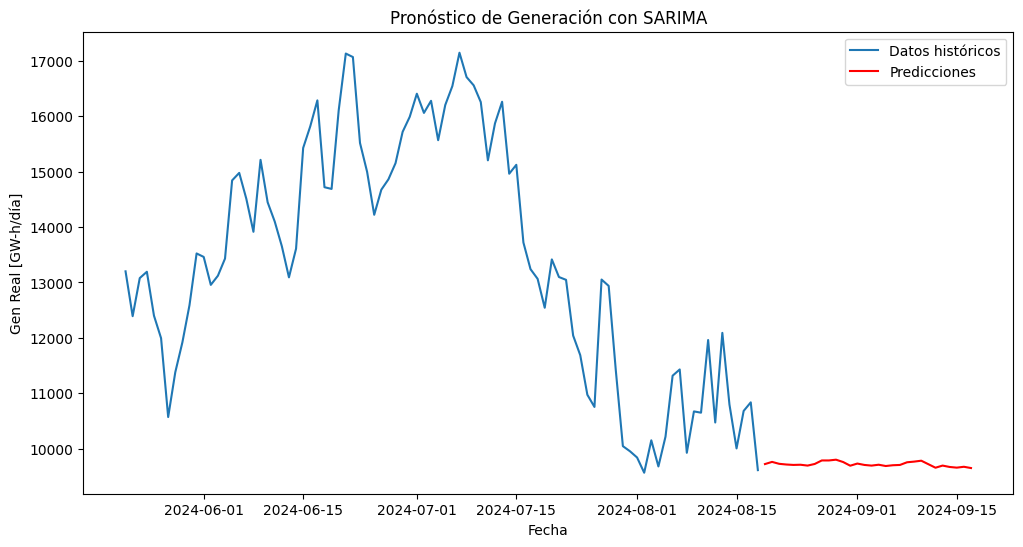

In [11]:
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(df_data.index[-90:], df_data[-90:], label='Datos históricos')
plt.plot(fechas_prediccion, predicciones, color='red', label='Predicciones')
plt.title('Pronóstico de Generación con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Gen Real [GW-h/día]')
plt.legend()
plt.show()

In [12]:
# Función para asignar los días de la semana a cada fecha, si es festivo se trata como un domingo
import holidays
co_holidays = holidays.Colombia()

def typedays(row,tipo):

     if tipo=='Weekday':
          return row['Date'].weekday()
     elif tipo=='TypeDay':
          if row['Date'] in co_holidays:
               return 3
          elif row['Date'].weekday()==5:
               return 2
          elif row['Date'].weekday()==6:
               return 3
          else:
               return 1
     elif tipo=='Month':
          return row['Date'].month
     elif tipo=='Year':
          return row['Date'].year

In [13]:
df_data.reset_index(inplace=True)
# Agregar tipo de día
df_data['TypeDay']=df_data.apply(lambda row: typedays(row,tipo='TypeDay'),axis=1)
# Definir día de la semana
df_data['Weekday']=df_data.apply(lambda row: typedays(row,tipo='Weekday'),axis=1)
# Definir mes
df_data['Month']=df_data.apply(lambda row: typedays(row,tipo='Month'),axis=1)
# Definir año
df_data['Year']=df_data.apply(lambda row: typedays(row,tipo='Year'),axis=1)

In [15]:
df_data.set_index('Date', inplace=True)

In [16]:
df_data

,Gendia,TypeDay,Weekday,Month,Year
Date,,,,,
2013-01-01,4925.62655,3,1,1,2013
2013-01-02,4799.93577,1,2,1,2013
2013-01-03,4731.06990,1,3,1,2013
2013-01-04,4684.38623,1,4,1,2013
2013-01-05,4620.25446,2,5,1,2013
...,...,...,...,...,...
2024-08-14,10796.15248,1,2,8,2024
2024-08-15,10002.72219,1,3,8,2024
2024-08-16,10679.94901,1,4,8,2024


In [26]:
lcol=df_data.columns[1:]

In [20]:
# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(df_data[['Gendia']],exog=df_data[['TypeDay','Weekday','Month','Year']], order=(2, 2, 2), seasonal_order=(1, 1, 1, 12))  # Especifica los órdenes de los términos ARIMA y estacionales
ajuste = modelo_sarima.fit()

c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\eramirez\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
ndays=30
delta=dt.timedelta(days=ndays)

sFechaIni='2024-08-19'


#Camniar a formato fecha
d_FechaIni=dt.datetime.strptime(sFechaIni,'%Y-%m-%d')

d_FechaFin=d_FechaIni + delta

print(d_FechaIni)
print(d_FechaFin)


2024-08-19 00:00:00
2024-09-18 00:00:00


In [24]:
# Función para asignar los días de la semana a cada fecha, si es festivo se trata como un domingo

def typedaysUnico(Date,tipo):

     if tipo=='Weekday':
          return Date.weekday()
     elif tipo=='TypeDay':
          if Date in co_holidays:
               return 3
          elif Date.weekday()==5:
               return 2
          elif Date.weekday()==6:
               return 3
          else:
               return 1
     elif tipo=='Month':
          return Date.month
     elif tipo=='Year':
          return Date.year

In [32]:
delta=dt.timedelta(days=1)

l_exo=[]
# Inicializar fecha
d_Fecha=d_FechaIni
while d_Fecha<d_FechaFin:

    l_new=[typedaysUnico(d_Fecha,tipo='TypeDay'),
        typedaysUnico(d_Fecha,tipo='Weekday'),
        typedaysUnico(d_Fecha,tipo='Month'),
        typedaysUnico(d_Fecha,tipo='Year') ]
    
    l_exo.append(l_new)

    d_Fecha=d_Fecha+delta

future_exog=pd.DataFrame(l_exo,columns=lcol)

In [33]:
# Realizar predicciones para los próximos 30 períodos
predicciones = ajuste.forecast(steps=30,exog=future_exog)

# Crear índice de fechas para las predicciones
fechas_prediccion = pd.date_range(start=df_data.index[-1], periods=31, freq='D')[1:]  # La primera fecha es el último día de los datos históricos, excluyéndola

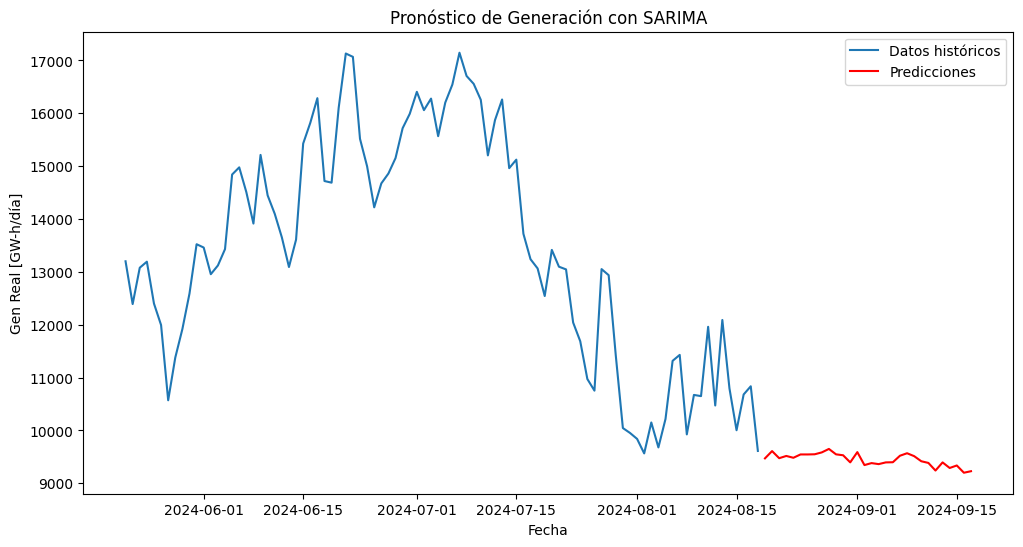

In [35]:
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(df_data['Gendia'].index[-90:], df_data['Gendia'][-90:], label='Datos históricos')
plt.plot(fechas_prediccion, predicciones, color='red', label='Predicciones')
plt.title('Pronóstico de Generación con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Gen Real [GW-h/día]')
plt.legend()
plt.show()